# INTRODUCTION

## Title: FIFA EDA and Player Rating Prediction

## Description:
Football is the most popular sport in the world, with millions of fans and players across the globe. FIFA is the international governing body for football, responsible for organizing the World Cup and other major tournaments. FIFA has a vast amount of data related to football, including player attributes, match results, team statistics, and more.

### Objective/Problem Statement?
We will explore the data to understand the distribution of player attributes, identify patterns and trends, and answer interesting questions about the world of football. Through this data science project, we aim to provide valuable insights to football enthusiasts, analysts, and researchers, who can use the information to understand the game better, predict player performance, and make informed decisions. Our aim is to predict a player’s rating in the latest edition of the FIFA Game.

### Where did we get the dataset from?
https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset?select=male_teams.csv

### Variable Description:

### Algorithms/Techniques Used:
Machine Learning Algorithms used:<br>
i)   Linear Regression<br>
ii)  Decision Tree<br>
iii) Random Forest <br><br>
Techniques: Data Cleaning, Null Value Imputation, Feature Scaling, Feature Engineering, Outlier Detection and Removal





© Diyesh Rajput, NUID: 002788618 <br>
  Vrushank Hiremath, NUID: 002926888

In [1]:
#installing dependencies
!pip install geopy
!pip install folium
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#import required libraries

# dataframe manipulation
import pandas as pd
import numpy as np

#scaling
from sklearn.preprocessing import MinMaxScaler

#regression model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


# model metrics
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import folium
import plotly.express as px
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as mpimg

## Data Gathering

Dataframe is a data structure used for machine learning because it provides a way to organize and manipulate data in a tabular format. In a Dataframe, data is arranged in rows and columns, similar to a spreadsheet. Each row represents an observation, and each column represents a feature or attribute of that observation.

Dataframes are used for machine learning for several reasons:

Data Preprocessing: Dataframes make it easy to preprocess and clean the data before training a machine learning model. This includes tasks such as handling missing values, removing duplicates, and scaling or normalizing the data.

Feature Engineering: Dataframes provide a convenient way to manipulate and engineer features, which can improve the performance of machine learning models. This includes tasks such as creating new features, selecting relevant features, and transforming existing features.

In summary, Dataframe is a useful data structure for machine learning because it provides a flexible and organized way to preprocess, engineer, train, and evaluate data for machine learning models.

In [4]:
# load data as pandas dataframe
players_df = pd.read_csv("https://raw.githubusercontent.com/rajputdi/DS6105_rajputdi/main/male_players%20(legacy).csv", 
                         low_memory=False)

In [5]:
# checking the loaded data
players_df.shape

(161583, 110)

In [6]:
# to quickly inspect the first few rows of the DataFrame and identify potential data issues
players_df.head()

player_id                                        player_url  fifa_version  \
0     158023                /player/158023/lionel-messi/150002            15   
1      20801  /player/20801/c-ronaldo-dos-santos-aveiro/150002            15   
2       9014                  /player/9014/arjen-robben/150002            15   
3      41236           /player/41236/zlatan-ibrahimovic/150002            15   
4     167495                /player/167495/manuel-neuer/150002            15   

   fifa_update fifa_update_date         short_name  \
0            2       2014-09-18           L. Messi   
1            2       2014-09-18  Cristiano Ronaldo   
2            2       2014-09-18          A. Robben   
3            2       2014-09-18     Z. Ibrahimović   
4            2       2014-09-18           M. Neuer   

                             long_name player_positions  overall  potential  \
0       Lionel Andrés Messi Cuccittini               CF       93         95   
1  Cristiano Ronaldo dos Santos Aveiro           LW, LM       92         92   
2                         Arjen Robben       RM, LM, RW       90         90   
3                   Zlatan Ibrahimović               ST       90         90   
4                   Manuel Peter Neuer               GK       90         90   

   ...   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  \
0  ...  62+3  62+3  62+3  54+3  45+3  45+3  45+3  54+3  15+3   
1  ...  63+3  63+3  63+3  57+3  52+3  52+3  52+3  57+3  16+3   
2  ...  64+3  64+3  64+3  55+3  46+3  46+3  46+3  55+3  14+3   
3  ...  65+3  65+3  61+3  56+3  55+3  55+3  55+3  56+3  17+3   
4  ...  40+3  40+3  36+3  36+3  38+3  38+3  38+3  36+3  87+3   

                                     player_face_url  
0  https://cdn.sofifa.net/players/158/023/15_120.png  
1  https://cdn.sofifa.net/players/020/801/15_120.png  
2  https://cdn.sofifa.net/players/009/014/15_120.png  
3  https://cdn.sofifa.net/players/041/236/15_120.png  
4  https://cdn.sofifa.net/players/167/495/15_120.png  

[5 rows x 110 columns]

In [7]:
# view summary of DataFrame's structure and content
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


In [8]:
#generates a statistical summary of a Pandas DataFrame
players_df.describe()

player_id   fifa_version  fifa_update        overall  \
count  161583.000000  161583.000000     161583.0  161583.000000   
mean   214484.722353      19.125514          2.0      65.699071   
std     34928.608856       2.559318          0.0       7.040855   
min         2.000000      15.000000          2.0      40.000000   
25%    199159.000000      17.000000          2.0      61.000000   
50%    220621.000000      19.000000          2.0      66.000000   
75%    236958.000000      21.000000          2.0      70.000000   
max    271817.000000      23.000000          2.0      94.000000   

           potential     value_eur       wage_eur            age  \
count  161583.000000  1.595300e+05  159822.000000  161583.000000   
mean       70.744008  2.326770e+06   10855.409768      25.123181   
std         6.259121  6.005746e+06   21941.656285       4.670207   
min        40.000000  1.000000e+03     500.000000      16.000000   
25%        66.000000  3.250000e+05    2000.000000      21.000000   
50%        70.000000  7.250000e+05    4000.000000      25.000000   
75%        75.000000  1.800000e+06   10000.000000      28.000000   
max        95.000000  1.940000e+08  575000.000000      54.000000   

           height_cm      weight_kg  ...  mentality_composure  \
count  161583.000000  161583.000000  ...        128722.000000   
mean      181.240205      75.235031  ...            57.816892   
std         6.750148       7.000456  ...            12.329739   
min       154.000000      49.000000  ...             3.000000   
25%       176.000000      70.000000  ...            50.000000   
50%       181.000000      75.000000  ...            59.000000   
75%       186.000000      80.000000  ...            66.000000   
max       208.000000     110.000000  ...            96.000000   

       defending_marking_awareness  defending_standing_tackle  \
count                161583.000000              161583.000000   
mean                     45.757957                  47.669996   
std                      20.453699                  21.336404   
min                       1.000000                   2.000000   
25%                      26.000000                  27.000000   
50%                      50.000000                  54.000000   
75%                      63.000000                  66.000000   
max                      94.000000                  94.000000   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
count             161583.000000        161583.00000         161583.000000   
mean                  45.698588            16.52961             16.274918   
std                   20.935273            17.67047             16.834294   
min                    3.000000             1.00000              1.000000   
25%                   25.000000             8.00000              8.000000   
50%                   52.000000            11.00000             11.000000   
75%                   64.000000            14.00000             14.000000   
max                   95.000000            91.00000             92.000000   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
count        161583.000000            161583.000000         161583.000000   
mean             16.140374                16.288861             16.636973   
std              16.476466                16.998697             17.980143   
min               1.000000                 1.000000              1.000000   
25%               8.000000                 8.000000              8.000000   
50%              11.000000                11.000000             11.000000   
75%              14.000000                14.000000             14.000000   
max              95.000000                92.000000             94.000000   

       goalkeeping_speed  
count       17969.000000  
mean           39.149090  
std            10.503788  
min            12.000000  
25%            31.000000  
50%            41.000000  
75%            46.000000  
max            68.

In [9]:
#viewing the datatypes of each column for feature engineering
players_df.dtypes

player_id            int64
player_url          object
fifa_version         int64
fifa_update          int64
fifa_update_date    object
                     ...  
cb                  object
rcb                 object
rb                  object
gk                  object
player_face_url     object
Length: 110, dtype: object

## Feature Engineering

## Stage 1: Data Cleaning

Data cleaning, also known as data preprocessing, is the process of identifying and correcting errors, inconsistencies, and incomplete information in a dataset. Data cleaning is essential before applying machine learning algorithms because it ensures that the input data is accurate, complete, and consistent, which can lead to more accurate and reliable results.

There are several reasons why data cleaning is important:

Improves accuracy: Data cleaning helps to remove errors and inconsistencies in the data, which can lead to inaccurate results when using machine learning algorithms.

Reduces bias: Biases can occur in data due to missing or incorrect information. Data cleaning helps to reduce these biases, leading to a more representative dataset and more accurate results.

Increases efficiency: Data cleaning can reduce the amount of time and resources needed to build a machine learning model by ensuring that the data is of high quality and requires less manipulation.

Enables better decision-making: Clean data can help decision-makers make better decisions by providing accurate and reliable insights into the data.

### Removing/Imputing missing values, dealing with outliers, correcting data types, handling duplicate data, etc

### Correcting data types and values

In [10]:
colname = [
  'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']

f = lambda x: x.str.extract(r'^(\d{2})', expand=False)
players_df[colname] = players_df[colname].apply(f).astype('float')

### Null Value Imputation

Null value imputation is a technique used to replace missing or null values in a dataset. Null values can occur due to various reasons such as incomplete data or data entry errors. The process of null value imputation involves replacing the missing values with estimated values based on the existing data.

Null value imputation is important because missing values can affect the accuracy and reliability of machine learning models. By imputing the missing values, the dataset can be more complete, leading to more accurate and reliable results from machine learning algorithms.

In [11]:
# viewing column names and checking for missing or null values
pd.set_option('display.max_rows', None)
players_df.isna().sum()

player_id                              0
player_url                             0
fifa_version                           0
fifa_update                            0
fifa_update_date                       0
short_name                             0
long_name                              0
player_positions                       0
overall                                0
potential                              0
value_eur                           2053
wage_eur                            1761
age                                    0
dob                                    0
height_cm                              0
weight_kg                              0
league_id                           1773
league_name                         1773
league_level                        2717
club_team_id                        1773
club_name                           1773
club_position                       1773
club_jersey_number                  1773
club_loaned_from                  152045
club_joined_date

In [12]:
#imputing null values by replace NaN values with 0
players_df['wage_eur'] = players_df['wage_eur'].fillna(0)
players_df['value_eur'] = players_df['value_eur'].fillna(0)
players_df['league_id'] = players_df['league_id'].fillna(0)
players_df['league_name'] = players_df['league_name'].fillna(0)
players_df['league_level'] = players_df['league_level'].fillna(0)
players_df['club_team_id']  = players_df['club_team_id'].fillna(0)
players_df['club_name'] = players_df['club_name'].fillna(0)
players_df['club_position'] = players_df['club_position'].fillna(0)
players_df['club_jersey_number'] = players_df['club_jersey_number'].fillna(0)
players_df['club_joined_date'] = players_df['club_joined_date'].fillna(0)
players_df['club_contract_valid_until_year'] = players_df['club_contract_valid_until_year'].fillna(0)
players_df['nation_team_id'] = players_df['nation_team_id'].fillna(0)
players_df['nation_position'] = players_df['nation_position'].fillna(0)
players_df['nation_jersey_number'] = players_df['nation_jersey_number'].fillna(0)
players_df['release_clause_eur'] = players_df['release_clause_eur'].fillna(0)
players_df['player_traits'] = players_df['player_traits'].fillna(0)
players_df['pace'] = players_df['pace'].fillna(0)
players_df['shooting'] = players_df['shooting'].fillna(0)
players_df['passing'] = players_df['passing'].fillna(0)
players_df['dribbling'] = players_df['dribbling'].fillna(0)
players_df['defending'] = players_df['defending'].fillna(0)
players_df['physic'] = players_df['physic'].fillna(0)
players_df['mentality_composure'] = players_df['mentality_composure'].fillna(0)
players_df['goalkeeping_speed'] = players_df['goalkeeping_speed'].fillna(0)
players_df['gk'] = players_df['gk'].fillna(0)

### Outlier Detection and Removal

Outliers are data points that are significantly different from other data points in a dataset. Outliers can be caused by various factors such as measurement errors, data entry errors, or rare events. Outlier detection is the process of identifying these data points and outlier removal is the process of either correcting or removing them from the dataset.

There are several methods for outlier detection and removal, including visual inspection, statistical methods, and machine learning algorithms. Visual inspection involves plotting the data to identify any points that fall outside of the expected range. Statistical methods such as z-score or interquartile range can also be used to identify outliers. Machine learning algorithms such as clustering and decision trees can also be used for outlier detection.

Outlier removal can be done by either correcting or deleting the outlier data points. Correction methods include replacing the outlier values with a mean or median value, while deletion involves removing the outlier data points altogether.

Outlier detection and removal is important because outliers can skew statistical analysis and machine learning models, leading to inaccurate results. By identifying and removing outliers, the data can be more representative and lead to more accurate and reliable insights.

<ipython-input-13-8660cb281431>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(players_df['overall'])


<Axes: xlabel='overall', ylabel='Density'>

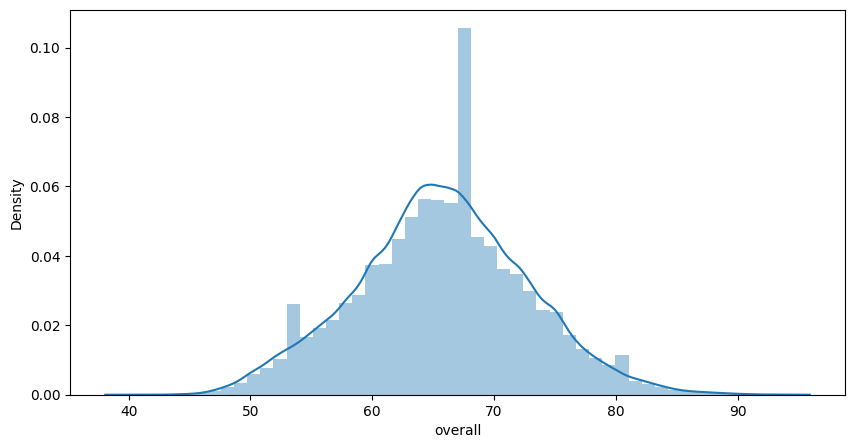

In [13]:
# distribution plot to identify outliers
plt.figure(figsize = (10,5))
sns.distplot(players_df['overall'])

In [14]:
def out_std(df, column):
    global lower,upper

    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()

    # calculate the cutoff value
    cut_off = data_std * 3

    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    
    # Calculate the number of records below and above lower and above bound value respectively
    df_lower = df[df[column] < lower]
    return print('Total number of outliers are', df_lower.shape[0] )

In [15]:
out_std(players_df,'overall')

The lower bound value is 44.57650531081872
Total number of outliers are 31


<ipython-input-16-3896f81bb8ec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(players_df['overall'], kde=False)


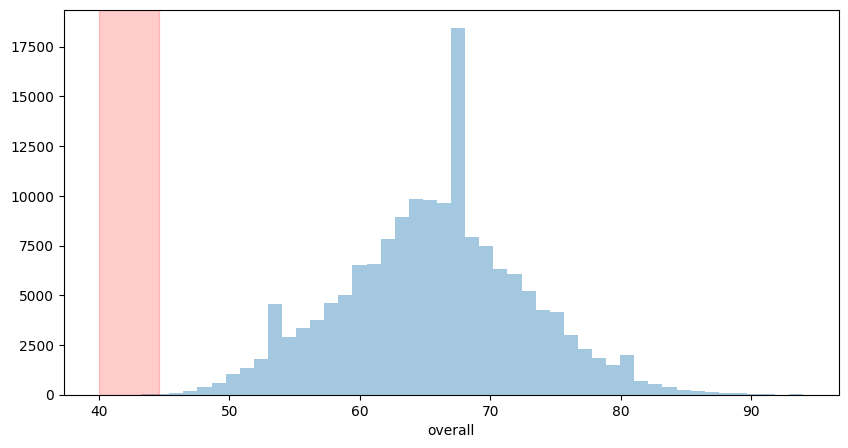

In [16]:
plt.figure(figsize = (10,5))
sns.distplot(players_df['overall'], kde=False)
plt.axvspan(xmin = lower,xmax= players_df['overall'].min(),alpha=0.2, color='red')

In [17]:
#removing the outliers
players_df = players_df[(players_df['overall'] >= lower)]

#dataset shape after removing outliers
players_df.shape

(161552, 110)

### Removing insignificant columns from the dataset

Utilizing my 15+ years of domain expertise in the sport, augmented by extensive data analysis, I assert with confidence that the attributes mentioned below exhibit no statistical significance in training our machine learning model, as they do not align with a player's overall rating: 


* player_url,
* fifa_update, 
* fifa_update_date, 
* long_name, 
* potential, 
* dob, 
* height, 
* weight, 
* wage_eur, 
* league_id, 
* league_name, 
* league_level, 
* club_team_id, 
* club_name, 
* club_position, 
* club_jersey_number, 
* club_loaned_from, 
* club_joined_date, 
* club_contract_valid_until_year, 
* nation_team_id, 
* nation_position, 
* nation_jersey_number, 
* preferred_foot, 
* release_clause_eur, 
* player_tags, 
* player_traits, 
* goalkeeping_speed

In [18]:
#dropping less-correlated columns as mentioned above
players_df_clean = players_df.drop(['player_url','dob', 'weight_kg','height_cm','short_name','long_name',
                                  'release_clause_eur','fifa_update','fifa_update_date',
                                  'club_jersey_number' ,'club_loaned_from', 'club_joined_date', 'club_name', 'club_position','wage_eur',
                                  'club_contract_valid_until_year', 'league_id','league_name','club_team_id','player_positions','international_reputation', 
                                  'nationality_name','preferred_foot','nation_team_id', 'nation_position','nation_jersey_number','player_tags',
                                  'player_traits', 'real_face', 'player_face_url', 'mentality_composure', 'goalkeeping_speed',
                                   'nationality_id', 'work_rate', 'body_type', 'league_level' ], axis=1)

### Correlation Matrix

A correlation matrix is a table that shows the correlation coefficients between pairs of variables in a dataset. Correlation coefficients measure the strength and direction of the linear relationship between two variables. A correlation matrix can help identify which variables are strongly or weakly correlated, which can inform feature selection or engineering decisions in machine learning. Correlation matrices are often visualized using heatmaps, where colors indicate the strength and direction of the correlation coefficients. A positive correlation coefficient indicates that the variables move in the same direction, while a negative correlation coefficient indicates that the variables move in opposite directions. A correlation coefficient of 0 indicates no linear relationship between the variables.

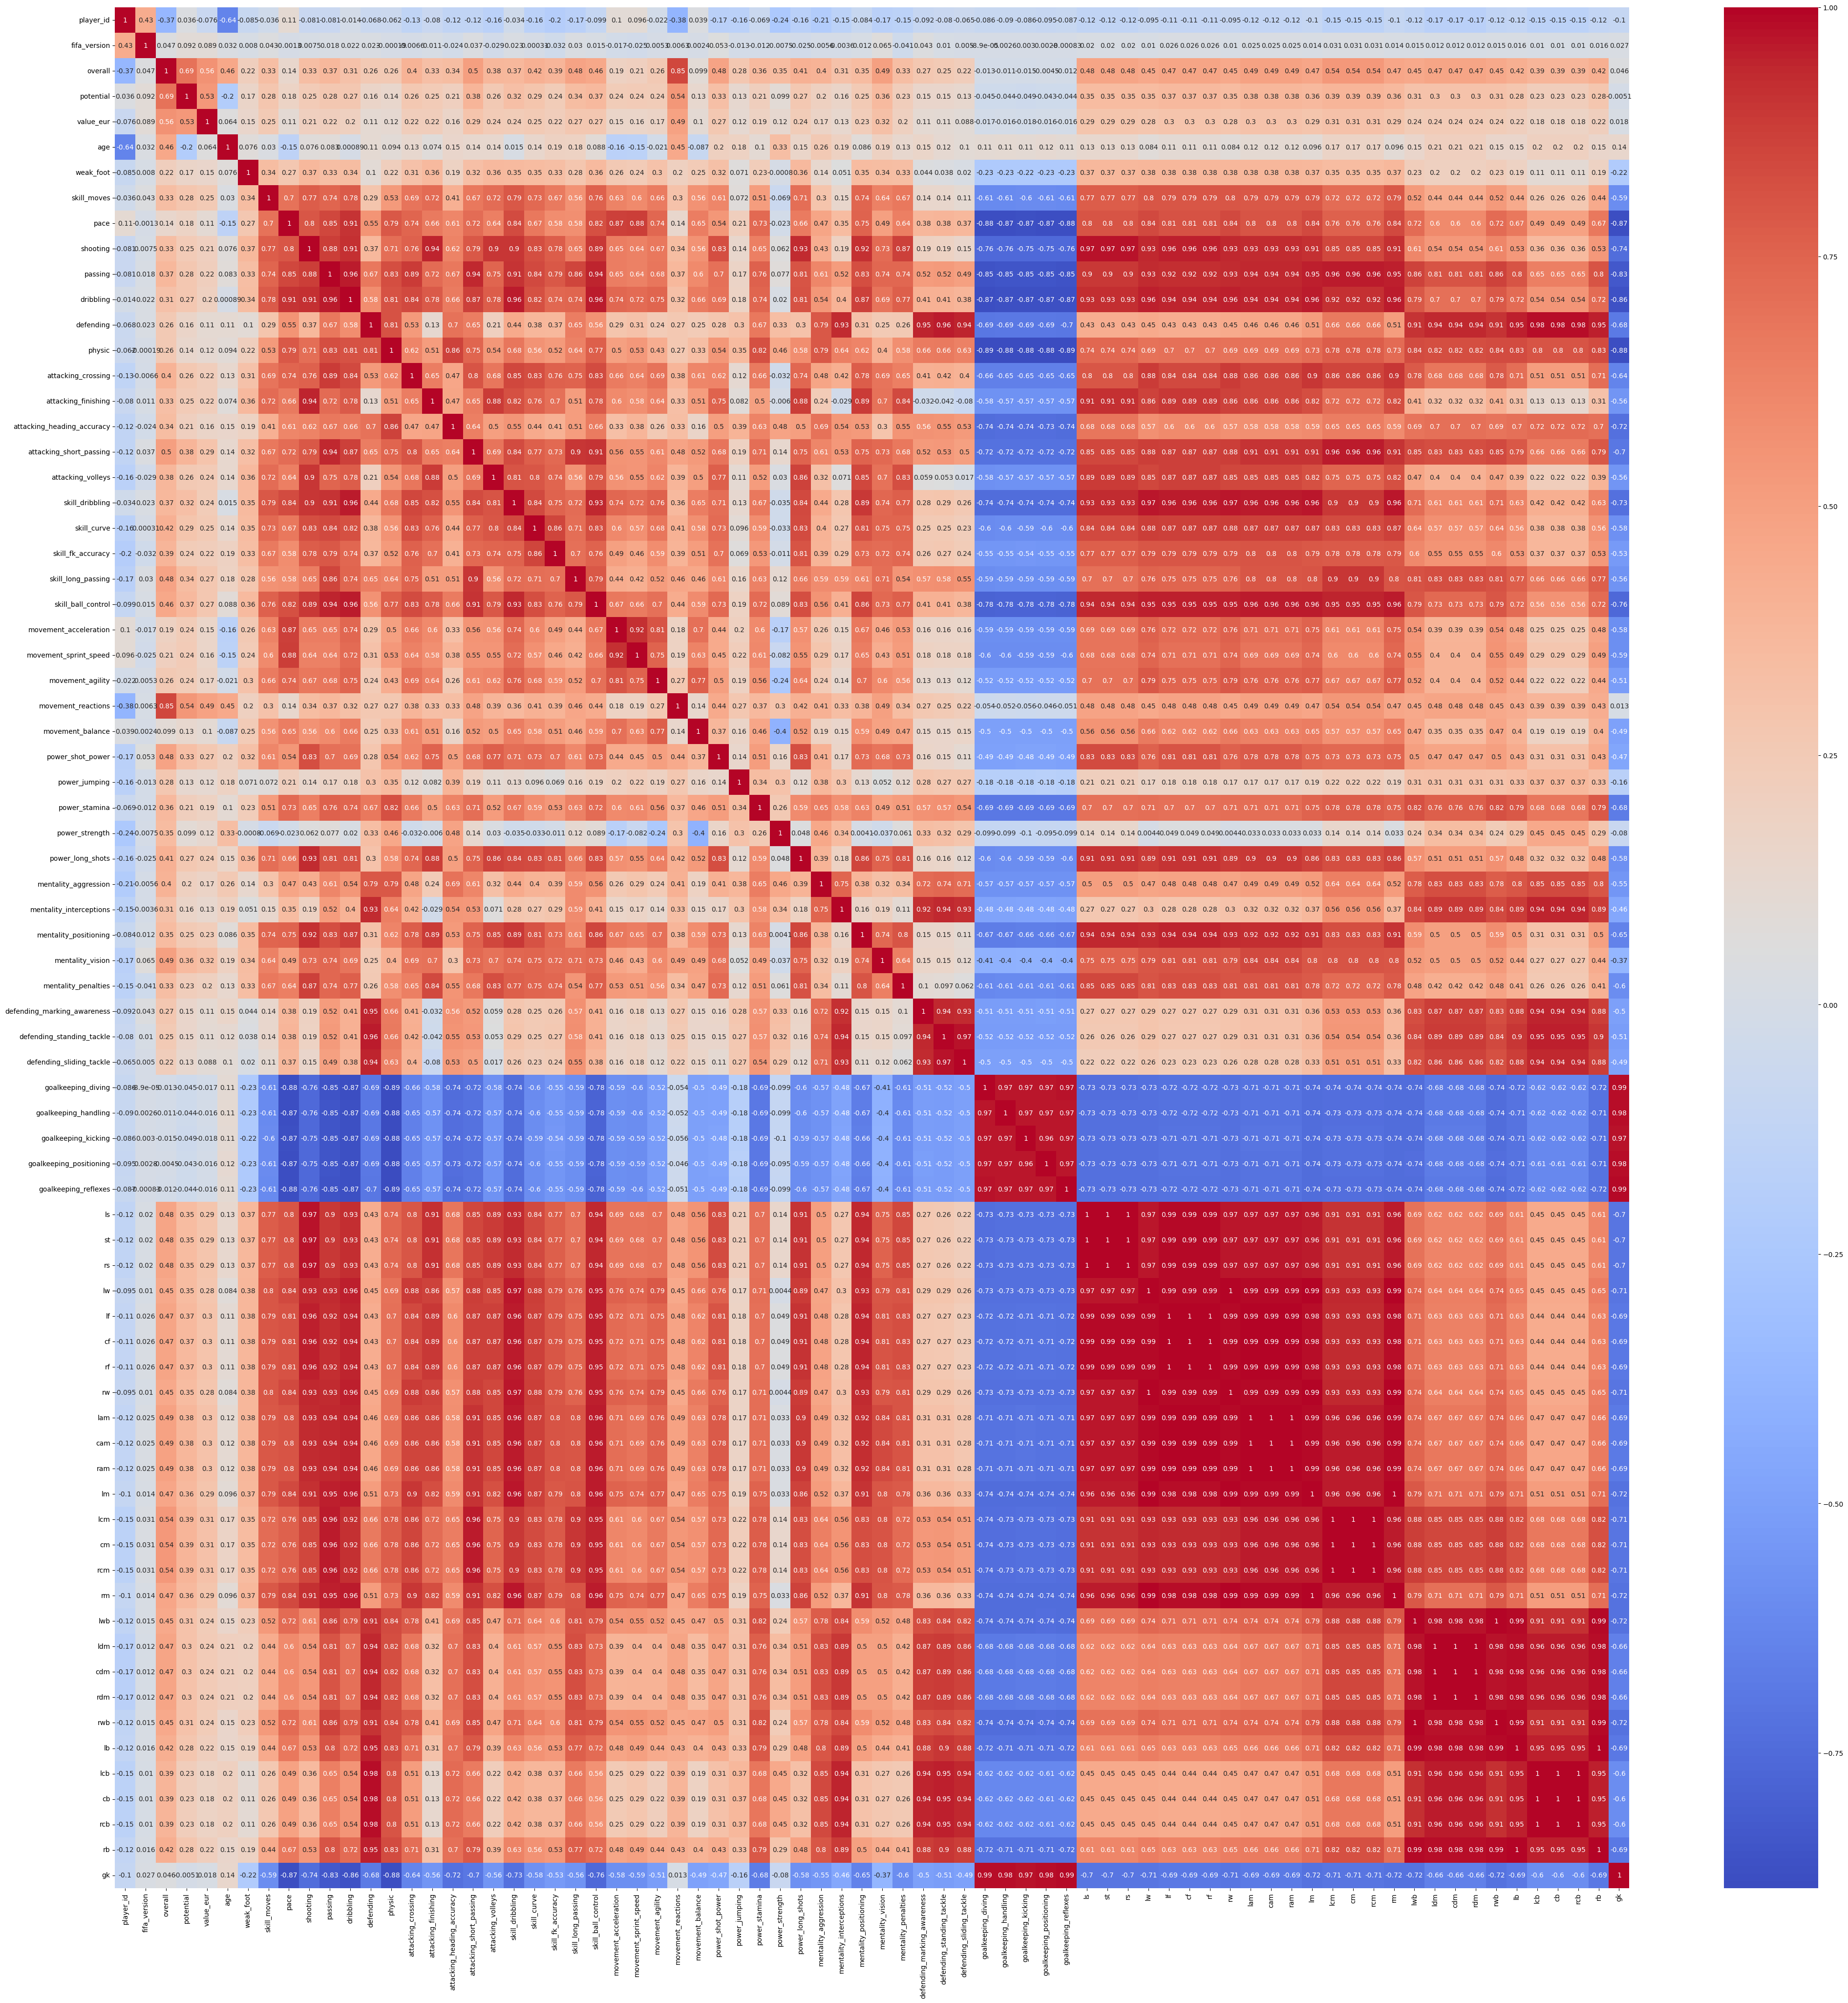

In [19]:
plt.figure(figsize=(50,50))
sns.heatmap(players_df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()

### Feature Combining

Feature combining, also known as feature engineering, is the process of creating new features from existing features in a dataset to improve the performance of machine learning models. Feature combining is important because it can help models identify more complex patterns in the data and improve their predictive accuracy.

Feature selection: selecting the most important features that contribute to the predictive accuracy of the model.

Dimensionality reduction: reducing the number of features in a dataset by combining or eliminating redundant features.

Feature combining is a crucial step in machine learning because it can help models identify more complex patterns in the data, leading to more accurate and reliable predictions. However, it is important to be cautious and avoid overfitting the model by creating too many features or features that are not relevant to the problem at hand.






In [20]:
#combining correlated features
players_df_clean['striker'] = (players_df_clean['ls'] + players_df_clean['st'] + players_df_clean['rs'])/3
players_df_clean['forward'] = (players_df_clean['lf'] + players_df_clean['cf'] + players_df_clean['rf'])/3
players_df_clean['attack_mid'] = (players_df_clean['lam'] + players_df_clean['cam'] + players_df_clean['ram'])/3
players_df_clean['center_mid'] = (players_df_clean['lcm'] + players_df_clean['cm'] + players_df_clean['rcm'])/3
players_df_clean['center_back'] = (players_df_clean['lcb'] + players_df_clean['cb'] + players_df_clean['rcb'])/3
players_df_clean['mid'] = (players_df_clean['lm'] + players_df_clean['rm'])/2
players_df_clean['wind'] = (players_df_clean['lw'] + players_df_clean['rw'])/2

In [21]:
#shape of dataset after feature combining
players_df_clean.shape

(161552, 81)

In [22]:
#dropping irrelevant columns
players_df_clean = players_df_clean.drop(['ls','st', 'rs','lf','cf','rf','lam','cam','ram','lcm','cm','rcm','lcb','cb','rcb','lm','rm','lw','rw'], axis=1)

In [23]:
#shape of dataset after removing irrelevant columns
players_df_clean.shape

(161552, 62)

In [24]:
players_df_clean.head()

player_id  fifa_version  overall  potential    value_eur  age  weak_foot  \
0     158023            15       93         95  100500000.0   27          3   
1      20801            15       92         92   79000000.0   29          4   
2       9014            15       90         90   54500000.0   30          2   
3      41236            15       90         90   52500000.0   32          4   
4     167495            15       90         90   63500000.0   28          4   

   skill_moves  pace  shooting  ...    lb    rb    gk  striker  forward  \
0            4  93.0      89.0  ...  54.0  54.0  15.0     89.0     90.0   
1            5  93.0      93.0  ...  57.0  57.0  16.0     91.0     91.0   
2            4  93.0      86.0  ...  55.0  55.0  14.0     84.0     87.0   
3            4  76.0      91.0  ...  56.0  56.0  17.0     87.0     86.0   
4            1   0.0       0.0  ...  36.0  36.0  87.0     38.0     37.0   

   attack_mid  center_mid  center_back   mid  wind  
0        92.0        79.0         45.0  90.0  92.0  
1        89.0        77.0         52.0  87.0  89.0  
2        88.0        78.0         46.0  87.0  88.0  
3        86.0        76.0         55.0  83.0  84.0  
4        36.0        36.0         38.0  38.0  36.0  

[5 rows x 62 columns]

## Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is an approach to analyzing and summarizing data in order to gain insights and identify patterns. EDA involves using statistical methods and visualization techniques to understand the distribution, shape, and relationships between variables in a dataset. The goal of EDA is to gain a better understanding of the data, identify outliers or missing values, and determine which variables are most important in predicting the outcome of interest. EDA can be used to identify potential issues with the data that may need to be addressed before modeling or to inform the selection of appropriate modeling techniques. EDA is an iterative process that often involves creating multiple visualizations and statistical summaries to explore different aspects of the data and refine the analysis.

### Nationality wise Distribution of Top 150 Players

Hover over each of the tooltip to see the count of the players in that country which are among the top 150 players in the world.

In [25]:
nation_df = players_df.loc[(players_df['fifa_version'] == 23)]
nation_df = nation_df.head(150)
nationalities = nation_df['nationality_name']
nation_df['nationality_name'] = nation_df['nationality_name'].replace(['Korea Republic'], 'South Korea')

# Use geopy to get the latitude and longitude for each nationality
geolocator = geopy.Nominatim(user_agent='my_app')
locations = nationalities.apply(lambda x: geolocator.geocode(x).point if geolocator.geocode(x) else None)
world_map = folium.Map(location=[0, 0], zoom_start=2)
for nationality, group in nation_df.groupby('nationality_name'):
  location = geolocator.geocode(nationality)
  count = len(group)
  tooltip = f"{nationality}: {count}"
  folium.Marker(location=[location.latitude, location.longitude], tooltip=tooltip).add_to(world_map)
display(world_map)

### Overall Rating of the Top 15 players over the time

In [26]:
players_df_top15  = players_df.copy(deep=True)
players_df_top15 .loc[players_df_top15 ['short_name'] == 'K. Mbappe Lottin', 'short_name'] = 'K. Mbappé'
players_df_top15 .loc[players_df_top15 ['short_name'] == 'Neymar Jr', 'short_name'] = 'Neymar'
players_df_top15  = players_df_top15 [players_df_top15 ['long_name'].isin(
    players_df_top15 [players_df_top15 ['fifa_version'] == 23].sort_values(
        by=['overall', 'potential'], ascending=[False, False])['long_name'][:15])]
players_df_top15 ['short_name'] = [x.rsplit('.', 1)[1].strip(' \t') if len(x.rsplit('.', 1)) > 1 else x for x in players_df_top15 ['short_name']]

fig = px.line(data_frame=players_df_top15 , x='fifa_version', y='overall', color = 'short_name')
fig.update_layout(title='Overall ratings trend of Top 15 players (FIFA 15 - FIFA 23)', title_x=0.5, font=dict(size=14),
                  template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='Player Name', xaxis=dict(title='FIFA game version', zeroline=False), yaxis=dict(title='Overall Ratings', zeroline=False))
fig.show()

<ipython-input-26-c3e92a7c4bfb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df_top15 ['short_name'] = [x.rsplit('.', 1)[1].strip(' \t') if len(x.rsplit('.', 1)) > 1 else x for x in players_df_top15 ['short_name']]


### Top 150 Players distributed among clubs (Top 20 clubs)

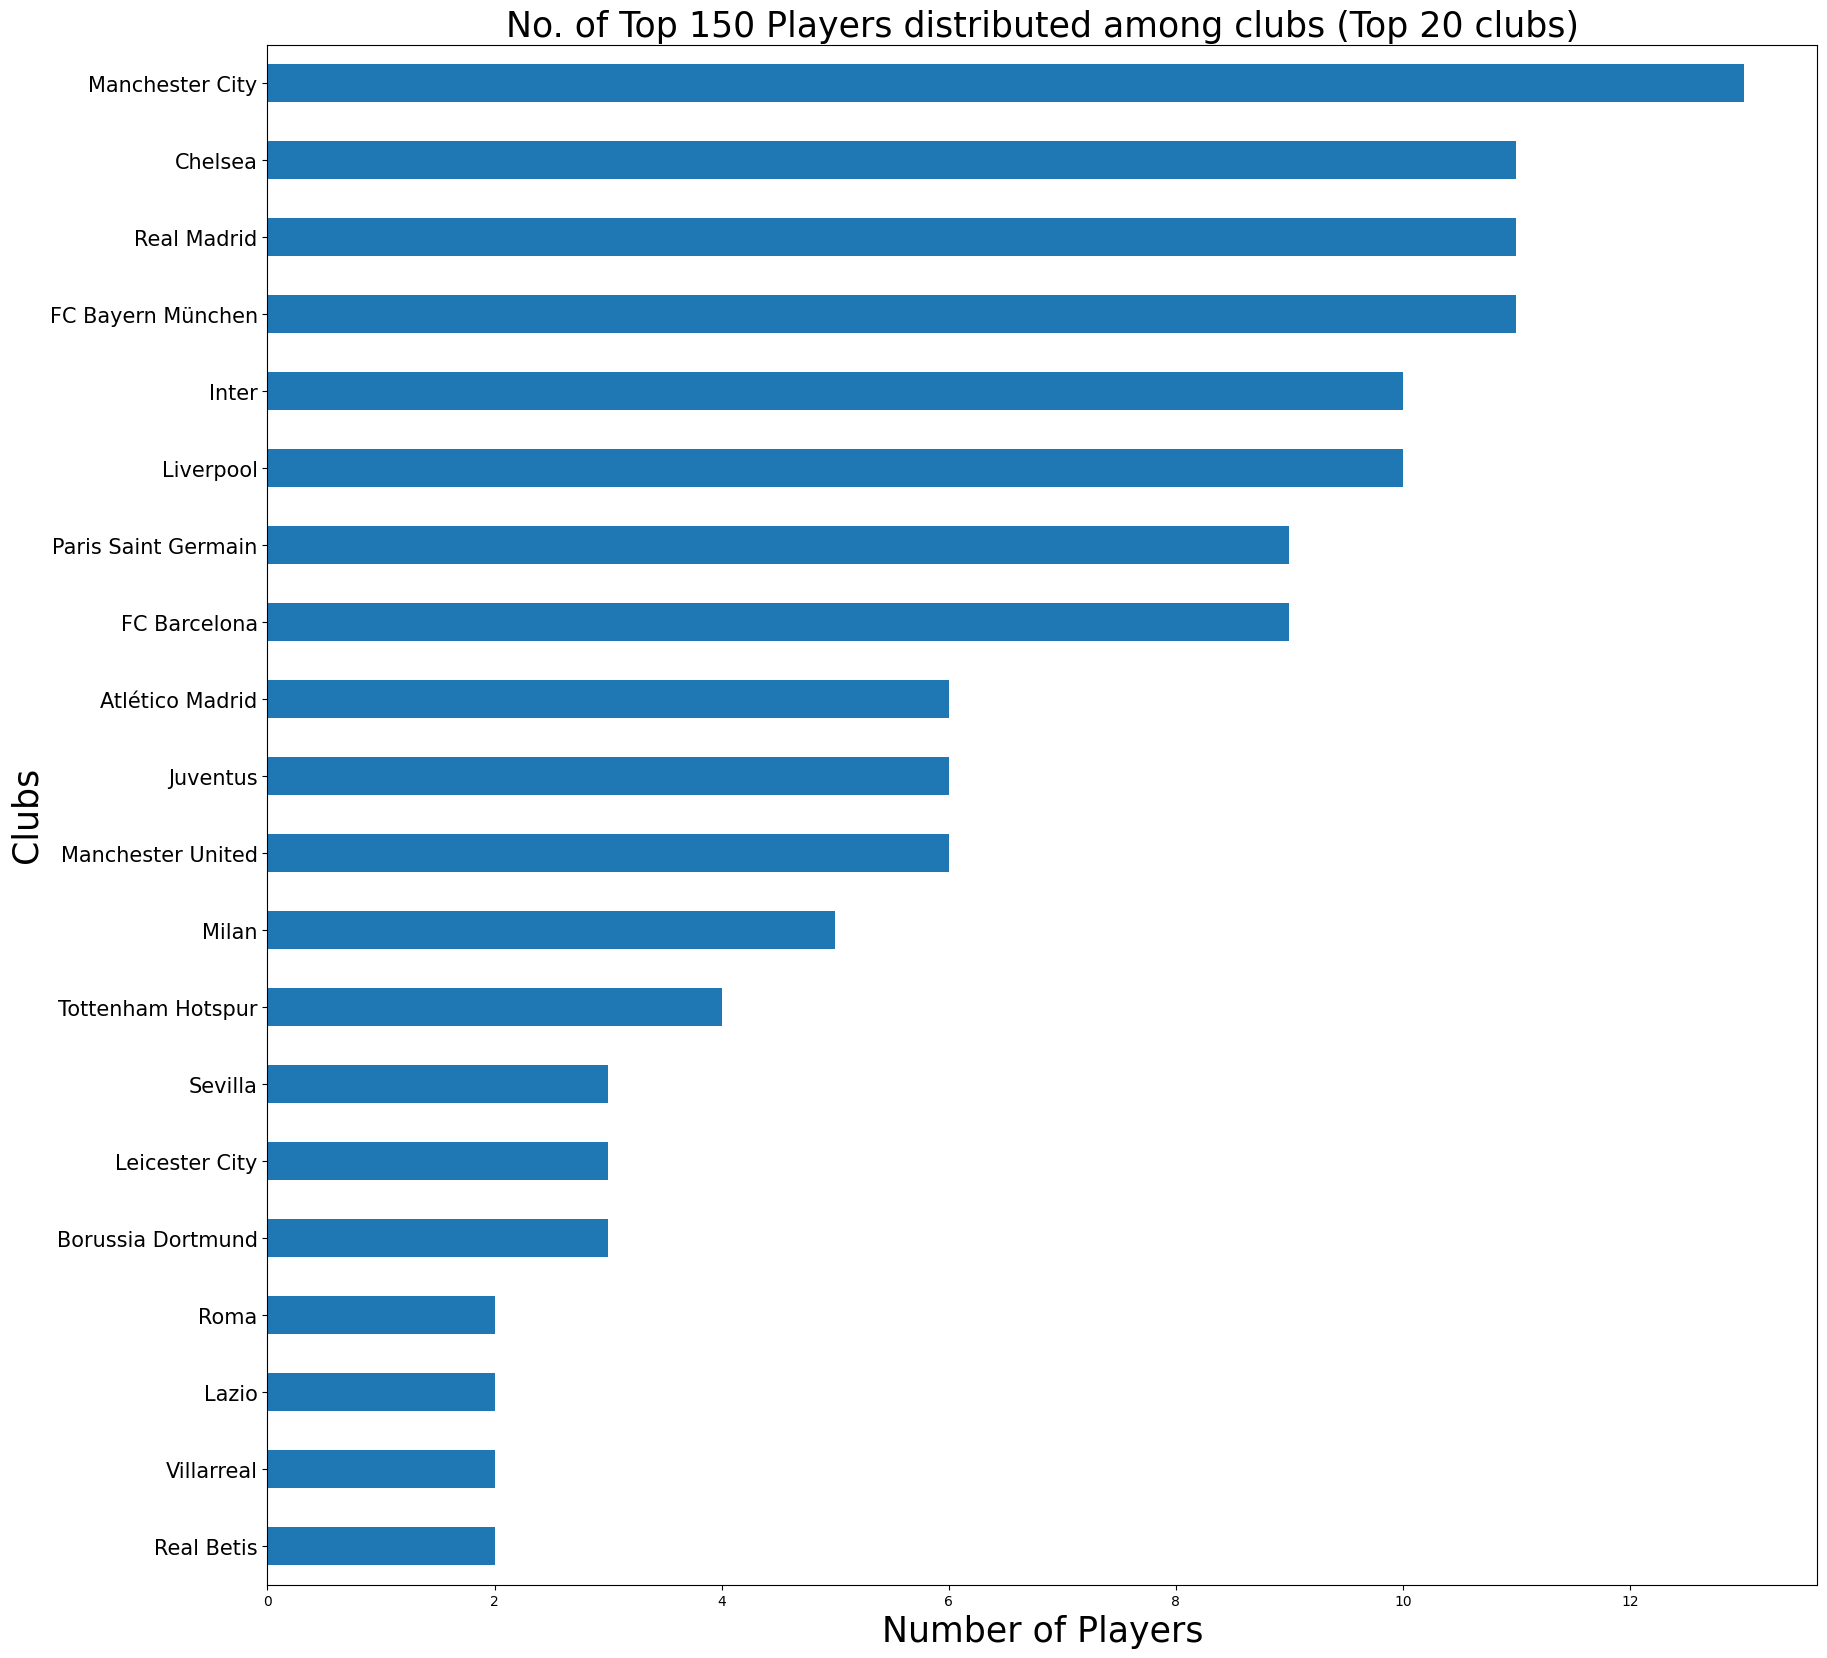

In [27]:
club_counts = nation_df['club_name'].value_counts().head(20)
club_counts = club_counts.sort_values(ascending=False)

# plot the bar graph
plt.figure(figsize=(20, 20))
club_counts.plot(kind='barh', fontsize = 10)
plt.gca().invert_yaxis()
plt.xlabel('Number of Players',fontsize=25)
plt.ylabel('Clubs', fontsize=25)
plt.title('No. of Top 150 Players distributed among clubs (Top 20 clubs)', fontsize=25)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='minor', labelsize=15)
plt.show()

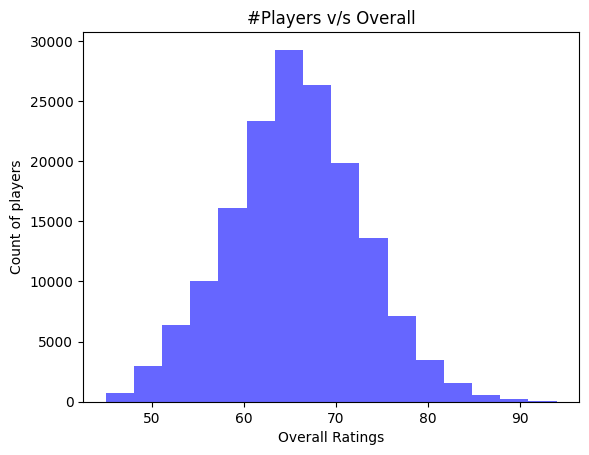

In [28]:
plt.hist(players_df.overall, bins=16, alpha=0.6, color='b')
plt.title("#Players v/s Overall")
plt.xlabel("Overall Ratings")
plt.ylabel("Count of players")
plt.show()

### Defining the Train and Test Dataset

When building a machine learning model, it is important to split your data into training and testing sets. This allows you to train your model on one set of data and then evaluate its performance on another set of data that it has not seen before.

One way to split the data is based on the values in a specific column, such as the "fifa_version" column in our DataFrame. 

To split the data based on the "version" column, you would first sort the DataFrame by that column. You would then choose a cutoff point, such as all the versions before FIFA 23, and split the data into two sets: one set containing the earlier versions and the other set containing the latest version.

You would use the earlier versions to train your model and then test it on the later version to see how well it generalizes to new data. This approach can help you avoid overfitting to the training data and ensure that your model performs well on future versions of the product.

In [29]:
# data from 2015-2022 will be used for training the model
train_df = players_df_clean.loc[(players_df_clean['fifa_version'] != 23)]

# 2023 data will be used for testing the model
test_df = players_df_clean.loc[(players_df_clean['fifa_version'] == 23)]

Dependent Variable in our dataframe: 'overall'

In [30]:
# Defining X (independent) and y (dependent/target) variable

X_train = train_df.drop(['overall','potential'],axis=1)
y_train = train_df['overall']

X_test = test_df.drop(['overall','potential'],axis=1)
y_test = test_df['overall']

# Extracting the top 10 features 

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# load your data into a pandas dataframe
#data = pd.read_csv('your_data.csv')

# separate your features (X) and target variable (y)
#X = data.iloc[:,:-1]  # select all columns except the last one
#y = data.iloc[:,-1]   # select the last column

# apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X_train, y_train)

# create a new dataframe with the top 20 features
top_features = pd.DataFrame({'Feature': X_train.columns[fit.get_support()], 'Score': fit.scores_[fit.get_support()]})

# sort the features by their score
top_features.sort_values(by='Score', ascending=False, inplace=True)

# print the top 10 features
print(top_features.head(10))
top10features = top_features['Feature'].tolist()

              Feature         Score
1           value_eur  1.738023e+12
0           player_id  1.158530e+08
9    power_long_shots  1.864960e+05
6         skill_curve  1.727913e+05
3             passing  1.635586e+05
2            shooting  1.553579e+05
7   skill_fk_accuracy  1.514524e+05
4  attacking_crossing  1.502074e+05
8  skill_long_passing  1.486279e+05
5   attacking_volleys  1.444705e+05


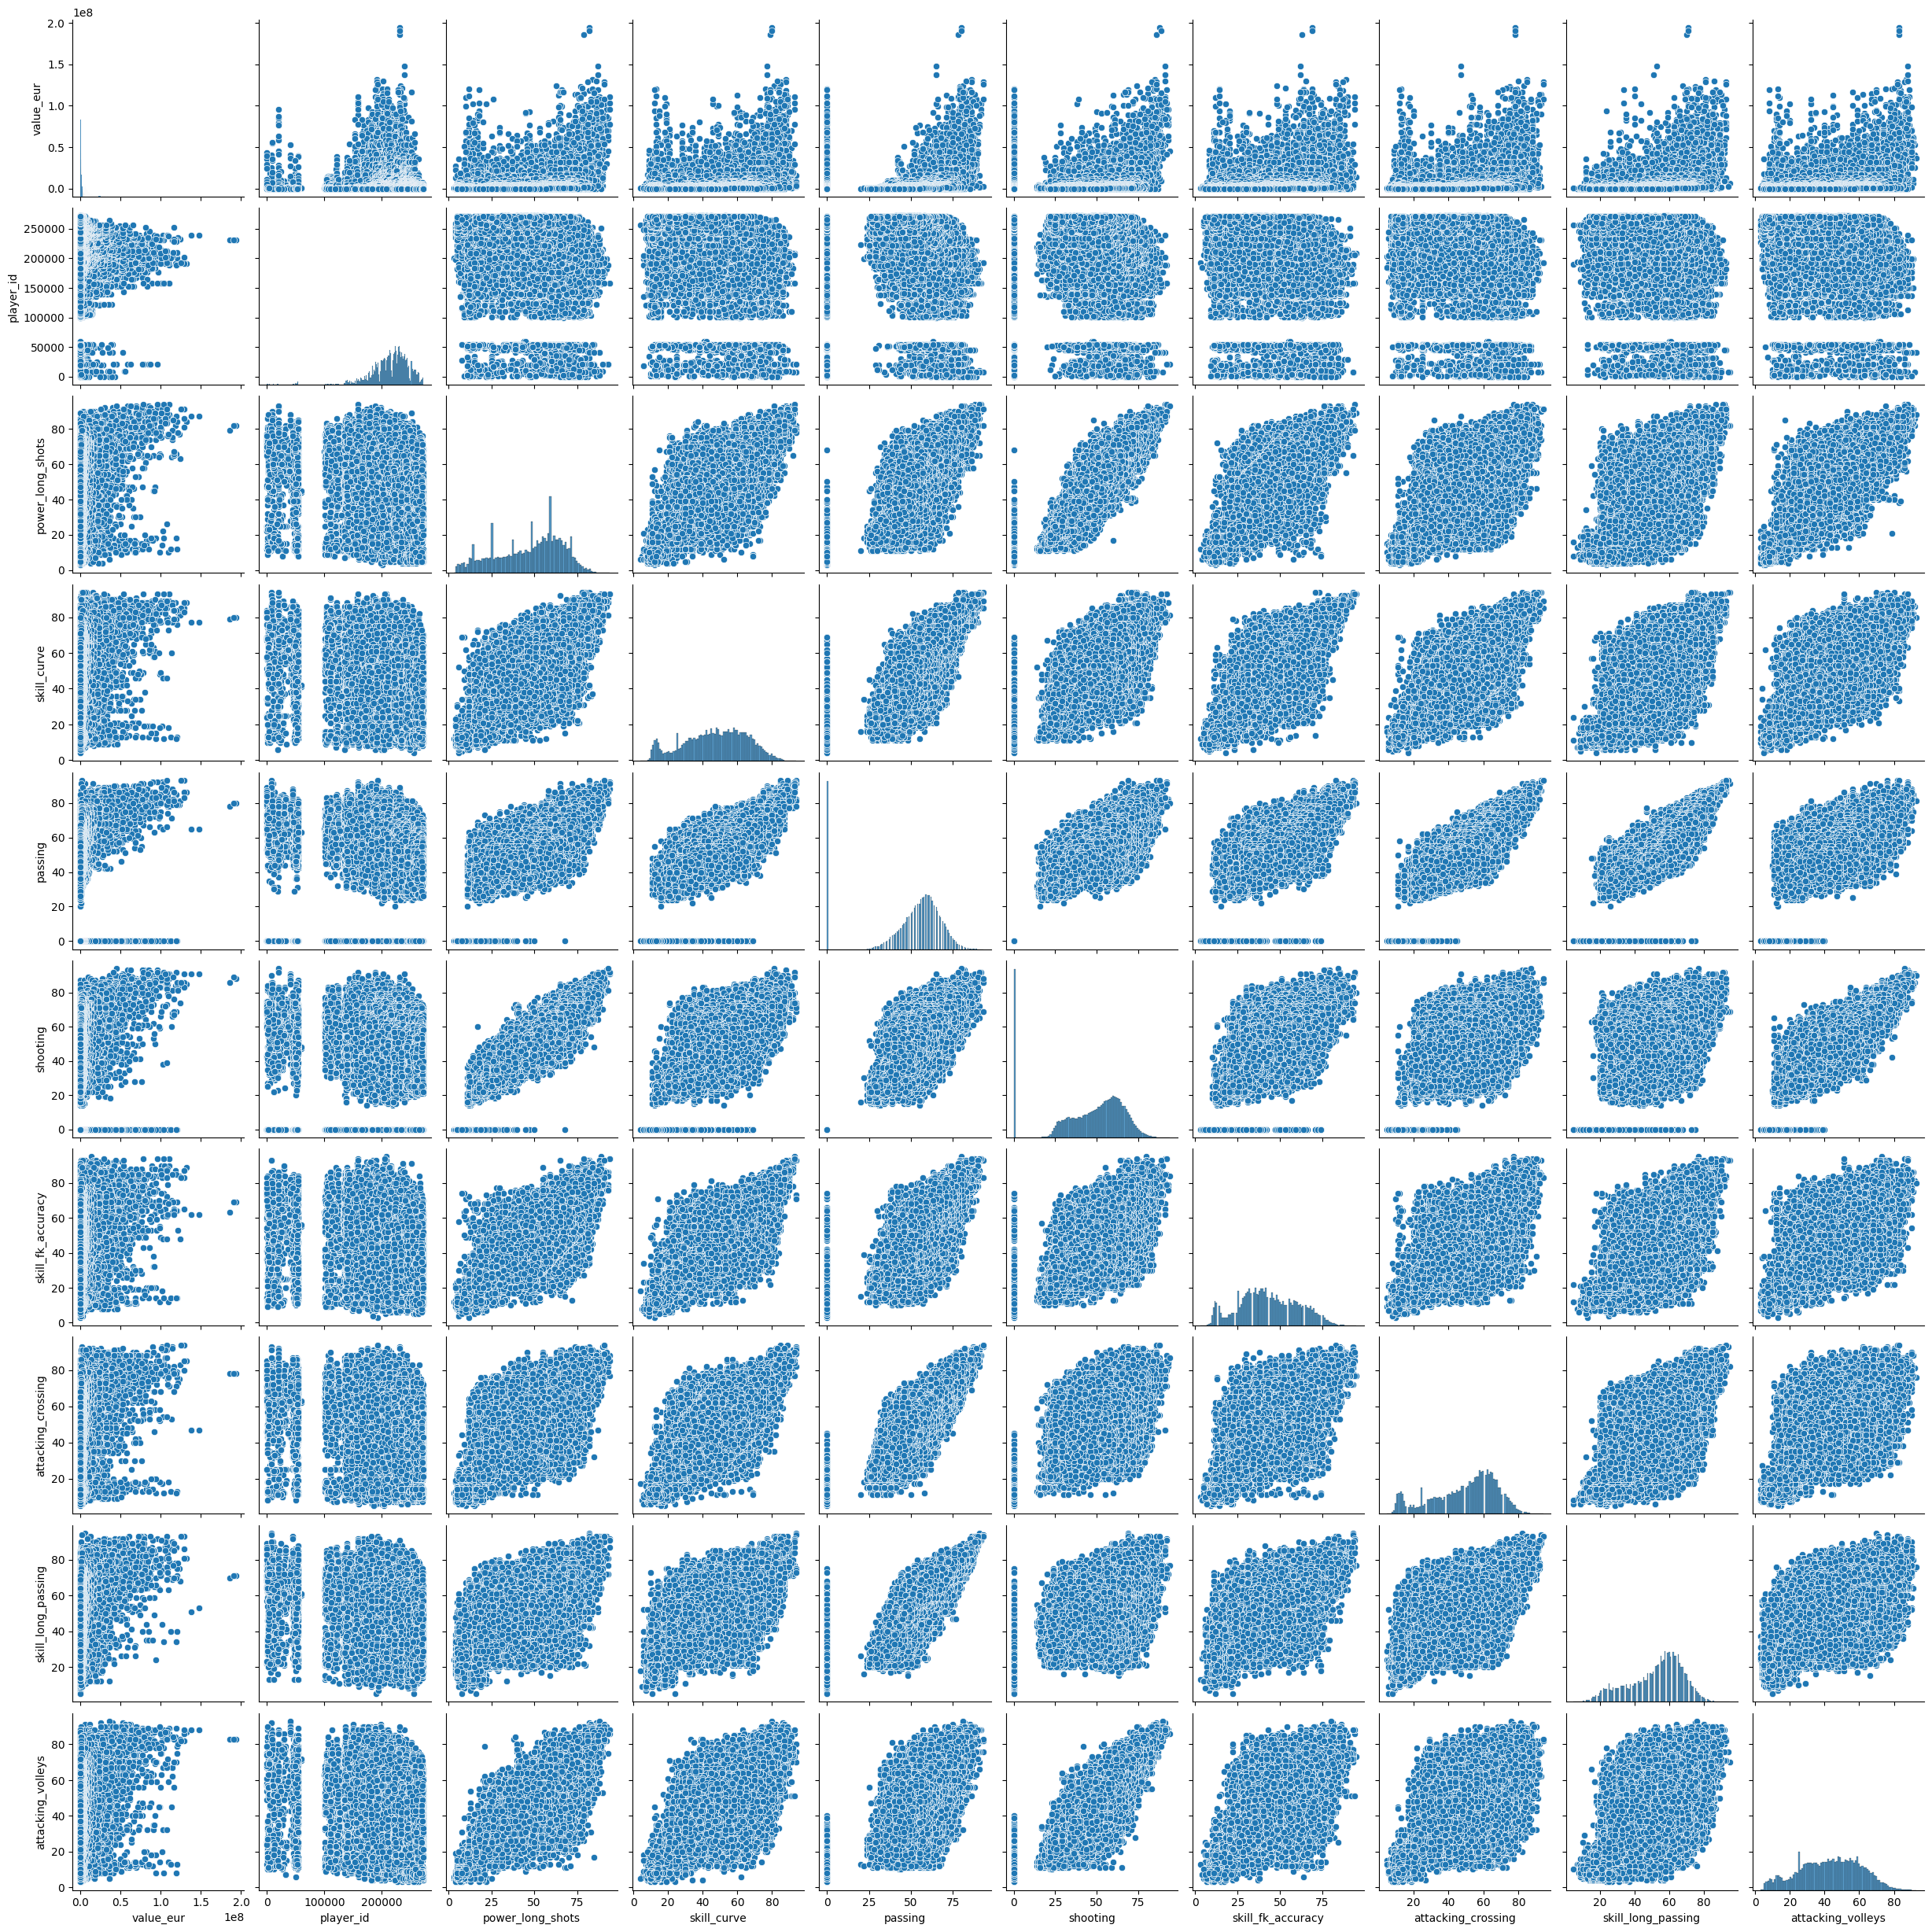

In [32]:
sns.pairplot(players_df[top10features])

### Feature Scaling

Feature scaling is a technique used to normalize the range of data features. It is important in machine learning because it can help improve the accuracy and efficiency of the model. The process of feature scaling involves transforming the data to a standardized range or distribution, typically by subtracting the mean and dividing by the standard deviation.

There are several methods of feature scaling, including standardization, min-max scaling, and normalization. Standardization transforms the data to have a mean of zero and a standard deviation of one. Min-max scaling scales the data to a range between zero and one. Normalization scales the data so that it has a magnitude of one.

In [33]:
#using MinMaxScaler to scale all the features between 0 to 1
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

## ML Models

### Linear Regression

Linear regression predicts the relationship between a dependent variable (y) and one or more independent variables (x) by fitting a linear equation to the observed data. The goal is to find the line of best fit that minimizes the distance between the predicted values and the actual values. Once the line of best fit is established, the equation can be used to make predictions for new values of the independent variable. In this case, we will be predicting a player’s rating based on other attributes. Ratings could be between 40-97. 

In [34]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lin_model.predict(X_test)
lin_acc = (round(r2_score(y_test, y_pred), 2))*100
print('Linear Model Accuracy:', lin_acc, '%')

Linear Model Accuracy: 89.0 %


In [36]:
# Calculate mean squared error of linear regression model on test data
lin_model_mse = round(mean_squared_error(y_test, y_pred),2)
print("Linear Regression MSE:", lin_model_mse)

Linear Regression MSE: 5.34


In [37]:
# Fit Lasso regression model with alpha=0.01
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.820e+05, tolerance: 7.134e+02



Lasso(alpha=0.01)

In [38]:
# Calculate R^2 of Lasso regression model on test data
lasso_reg_r2 = lasso_reg.score(X_test, y_test)
lasso_lin_acc = round(lasso_reg_r2, 2)*100
print("Lasso Regression R^2:", lasso_lin_acc, '%')

Lasso Regression R^2: 88.0 %


In [39]:
# Calculate mean squared error of Lasso regression model on test data
lasso_reg_mse = round(mean_squared_error(y_test, lasso_reg.predict(X_test)),2)
print("Lasso Regression MSE:", lasso_reg_mse)

Lasso Regression MSE: 5.35


In [40]:
# Fit Ridge regression model with alpha=0.01
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.23609e-20): result may not be accurate.



Ridge(alpha=0.01)

In [41]:
# Calculate R^2 of Ridge regression model on test data
ridge_reg_r2 = round(ridge_reg.score(X_test, y_test),2)*100
print("Ridge Regression R^2:", ridge_reg_r2, '%')

Ridge Regression R^2: 89.0 %


In [42]:
# Calculate mean squared error of Ridge regression model on test data
ridge_reg_mse = round(mean_squared_error(y_test, ridge_reg.predict(X_test)),2)
print("Ridge Regression MSE:", ridge_reg_mse)

Ridge Regression MSE: 5.34


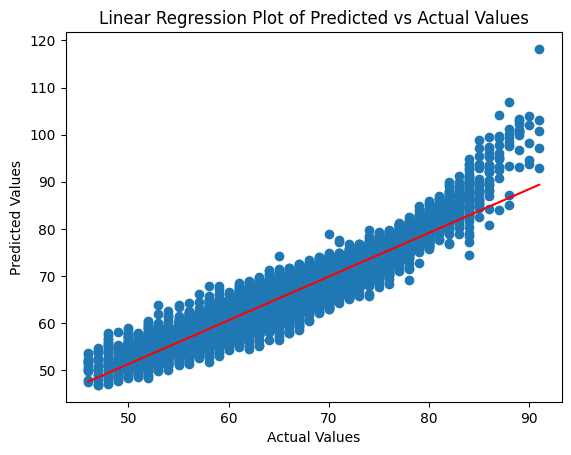

In [43]:
# Create scatter plot
import numpy as np
plt.scatter(y_test, y_pred)

# Add regression line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b,color='red')

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Plot of Predicted vs Actual Values")

# Show plot
plt.show()

### Decision Tree

Decision trees predict numerical values treating the target variable as a continuous variable, using threshold values to split data and create branches that represent different ranges of the target variable. The algorithm recursively creates splits until a stopping criterion is met, and final predictions are often the average value of the target variable within each terminal node. This regression trees approach finds application in diverse fields, including predicting house or stock prices.

In [44]:
DT_model = DecisionTreeClassifier(splitter='best', 
                                      criterion='entropy', min_samples_leaf=2)
DT_model.fit(X_train, y_train)
DT_predictions = DT_model.predict(X_test)
DT_score = round(accuracy_score(y_test, DT_predictions),2)*100

In [45]:
print('Decision Tree Model Accuracy:', DT_score, '%')

Decision Tree Model Accuracy: 80.0 %


In [46]:
# Calculate mean squared error of DT regression model on test data
DT_model_mse = round(mean_squared_error(y_test, DT_predictions),2)
print("Decision Tree Regression MSE:", DT_model_mse)

Decision Tree Regression MSE: 0.47


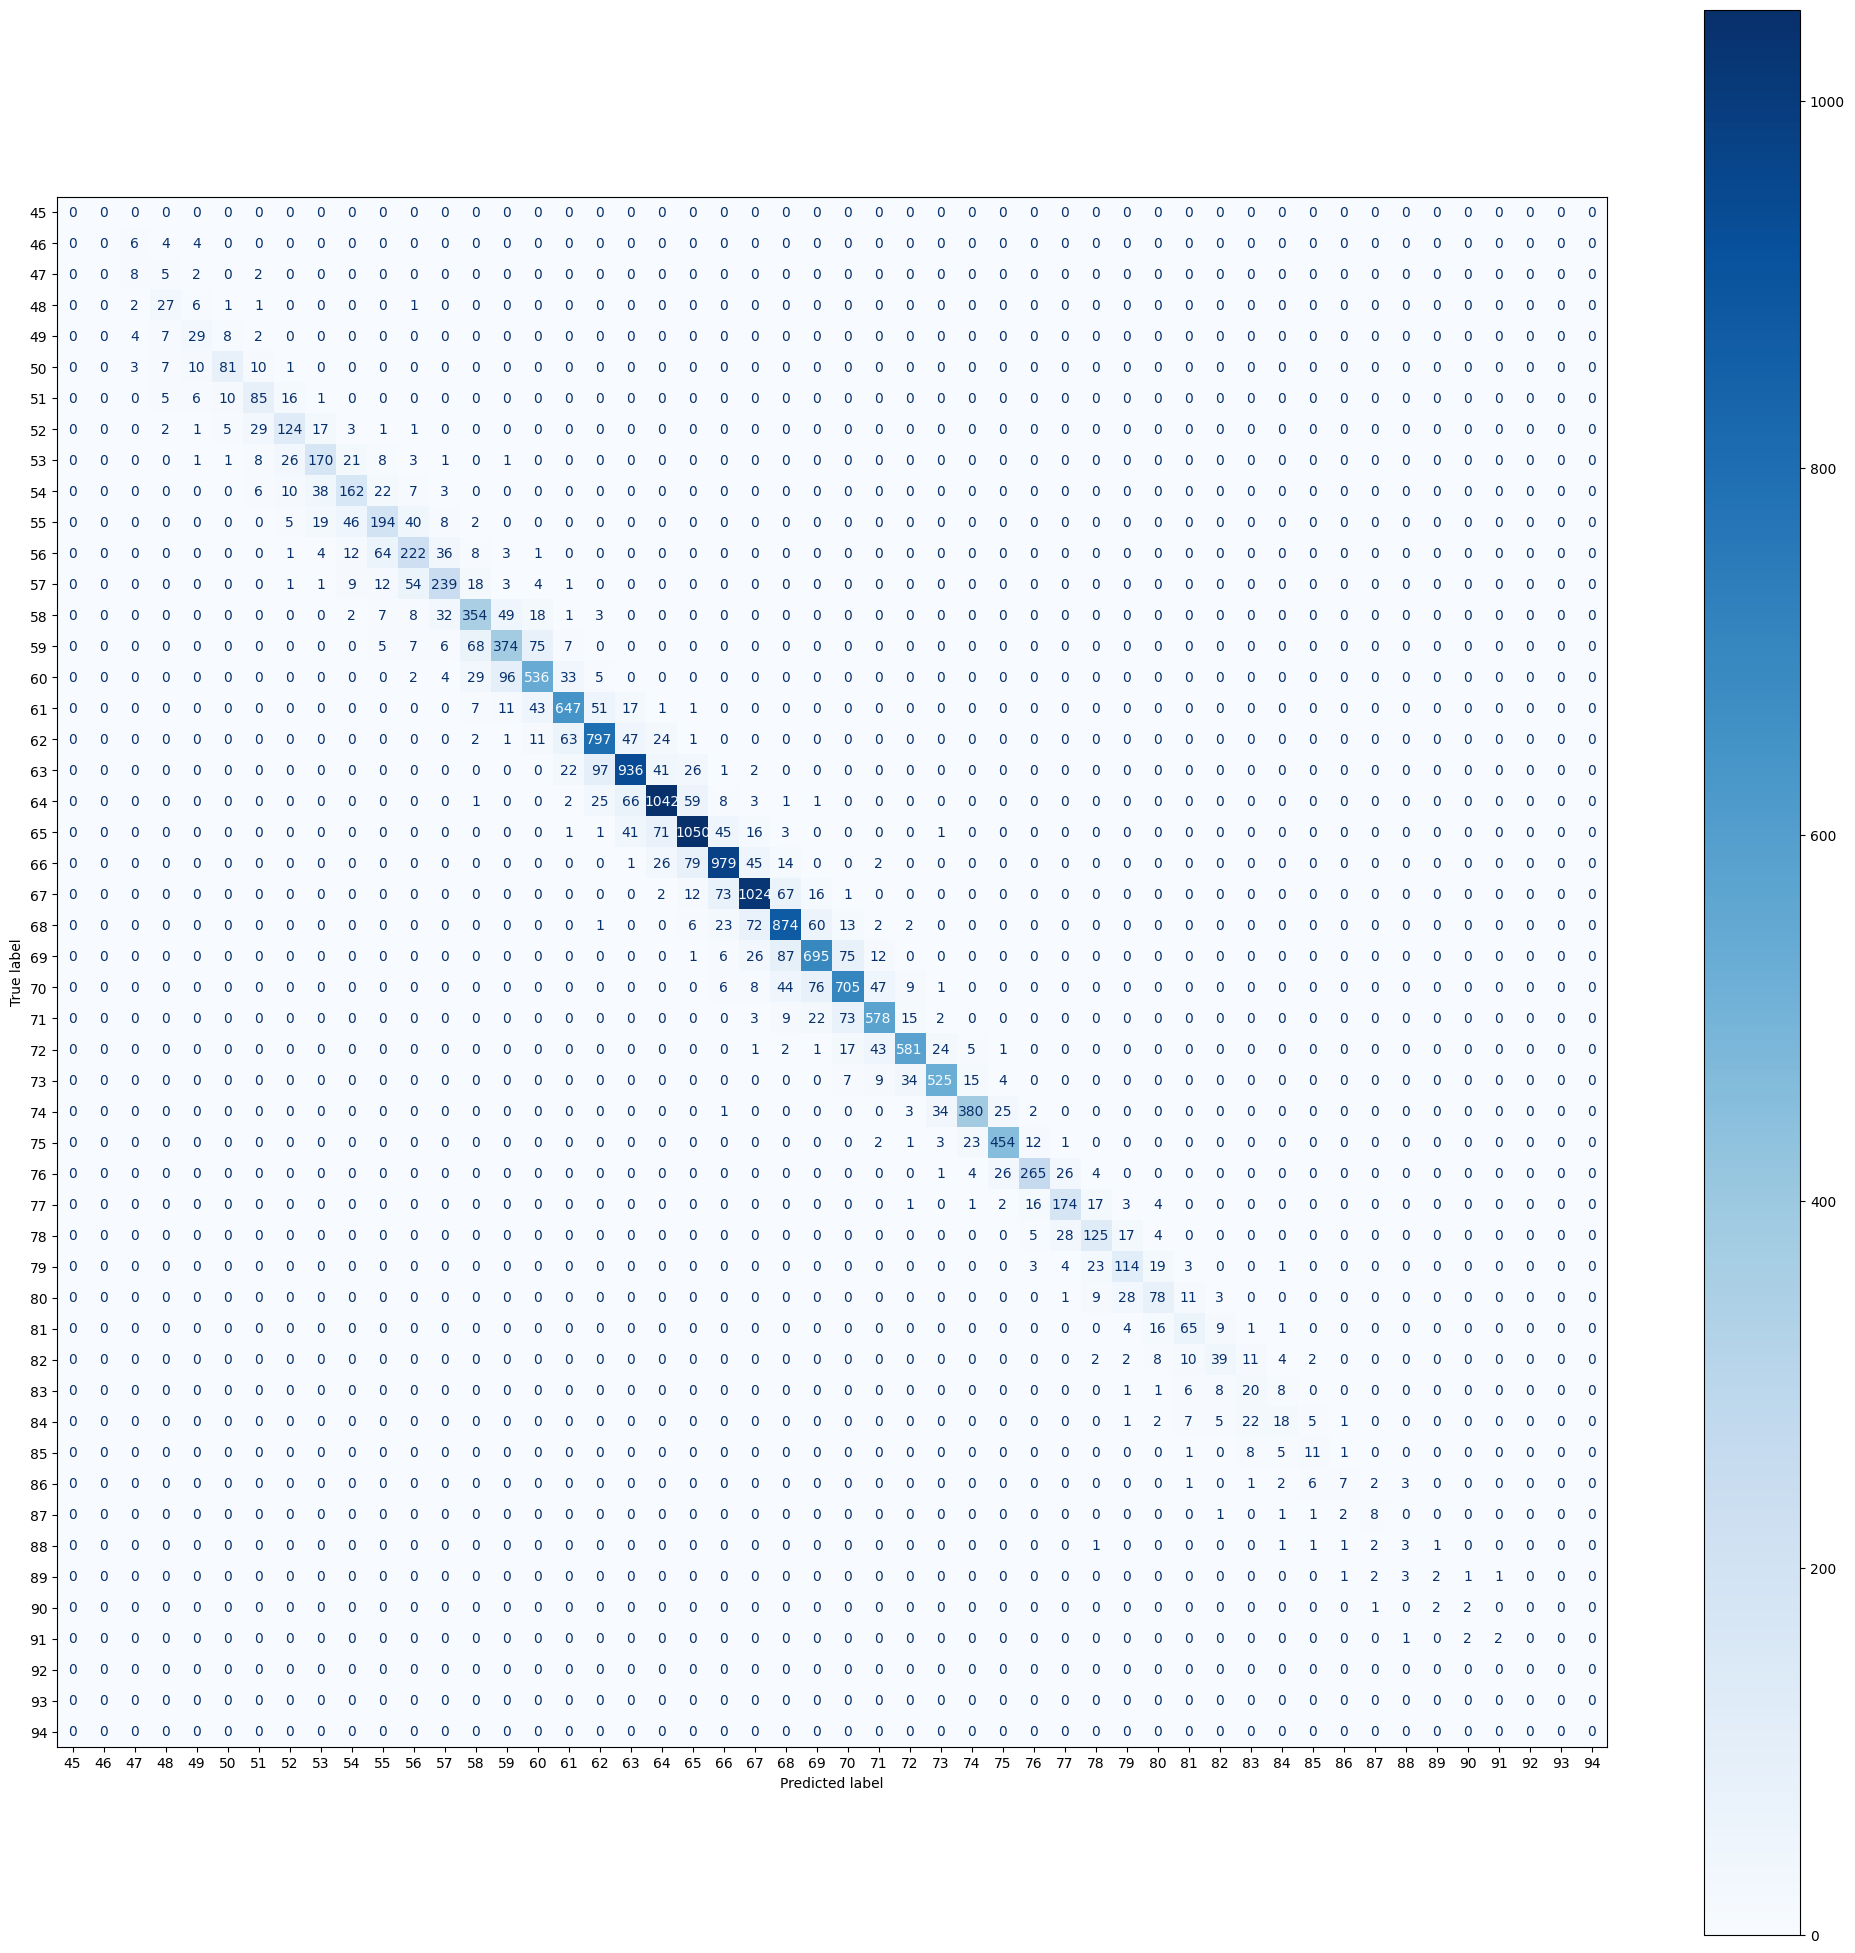

In [47]:

fig, ax = plt.subplots(figsize=(25, 25))
#ConfusionMatrixDisplay(DT_model, X_test, DT_predictions, cmap=plt.cm.Blues, ax=ax)

#plt.title("Decision Tree Confusion Matrix")
# Show plot
#plt.show()


cm = confusion_matrix(y_test, DT_predictions, labels=DT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.show()

### Random Forest

Random Forest is a machine learning algorithm used for classification and regression tasks. It consists of a collection of decision trees that are trained on different random subsets of the training data. Each decision tree in the forest makes a prediction for the target variable based on the values of the input features. The final prediction is made by averaging the predictions of all the trees in the forest.

In [48]:
RF_model = RandomForestRegressor(n_estimators=10, max_depth=10, min_samples_leaf=3, random_state=42)
RF_model_1 = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=3, random_state=42)
RF_model.fit(X_train, y_train)
RF_model_1.fit(X_train, y_train)
RF_predictions = RF_model.predict(X_test)

RF_score = round(r2_score(y_test, RF_predictions), 2)*100

In [49]:
print('Random Forest Model Accuracy:', RF_score, '%')

Random Forest Model Accuracy: 99.0 %


In [50]:
# Calculate mean squared error of DT regression model on test data
RF_model_mse = round(mean_squared_error(y_test, RF_predictions),2)
print("Random Forest Regression MSE:", RF_model_mse)

Random Forest Regression MSE: 0.58


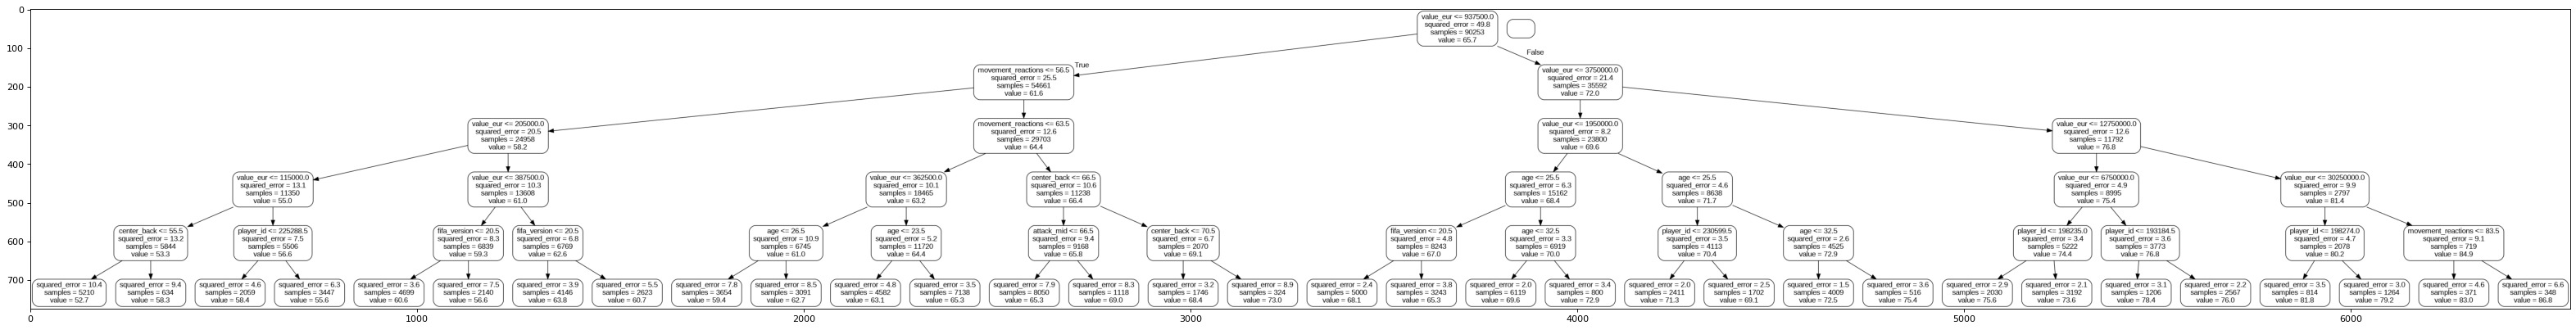

In [51]:
#Ran this in Google Colab to get this tree. DO NOT RUN THIS IN Jupyter
# Visualization of Nodes for the purpose of explainability
plt.figure(figsize=(50, 40), dpi=80)
RF = RF_model_1.estimators_[0]
export_graphviz(
    RF,
    out_file="tree.dot",
    feature_names=list(X_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

# Evaluation and Comparison

In [52]:
# Create a dictionary to store the model performances
performances = {'Model': ['Linear Regression', 'Lasso Reg', 'Ridge Reg', 'Decision Tree', 'Random Forest'],
        'Accuracy (%)': [lin_acc, lasso_lin_acc, ridge_reg_r2, DT_score, RF_score],
        'MSE': [lin_model_mse, lasso_reg_mse, ridge_reg_mse, DT_model_mse, RF_model_mse]}

#form a dataframe from the above data
model_performance = pd.DataFrame(performances)

#view dataframe
model_performance

Model  Accuracy (%)   MSE
0  Linear Regression          89.0  5.34
1          Lasso Reg          88.0  5.35
2          Ridge Reg          89.0  5.34
3      Decision Tree          80.0  0.47
4      Random Forest          99.0  0.58

<ipython-input-53-98430039e7f4>:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




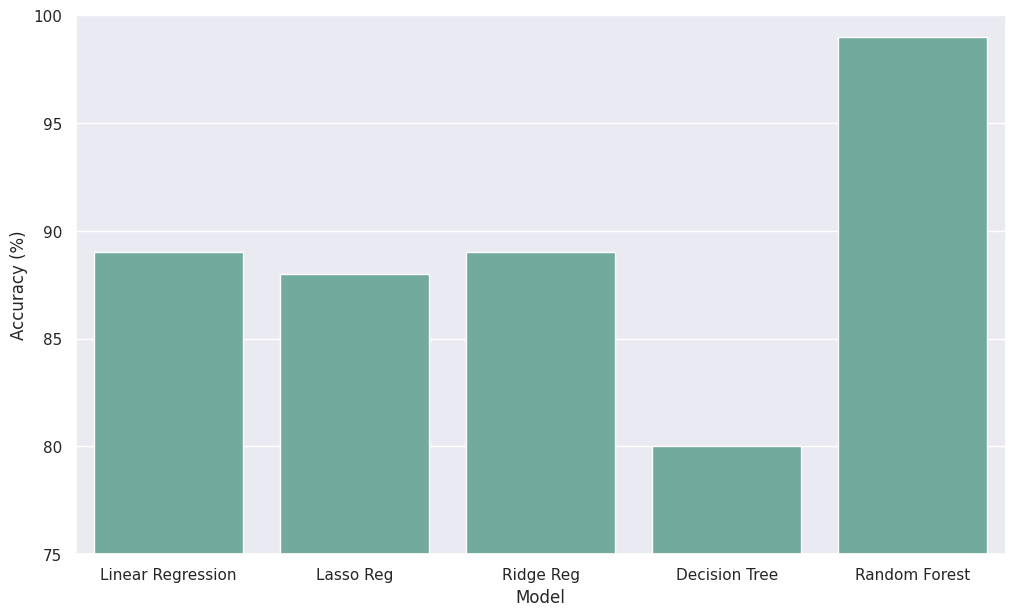

In [53]:
#plot accuracy comparison

sns.set(style="darkgrid")

# Set the figure size
fig, ax =  plt.subplots(figsize=(12, 7))
ax.set_ylim(75, 100)

# plot a bar chart
sns.barplot(
    x="Model", 
    y="Accuracy (%)", 
    data=model_performance,  
    ci=None, 
    color='#69b3a2',
    orient = 'v');
plt.show()

<ipython-input-54-eb5a1d9eeab3>:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




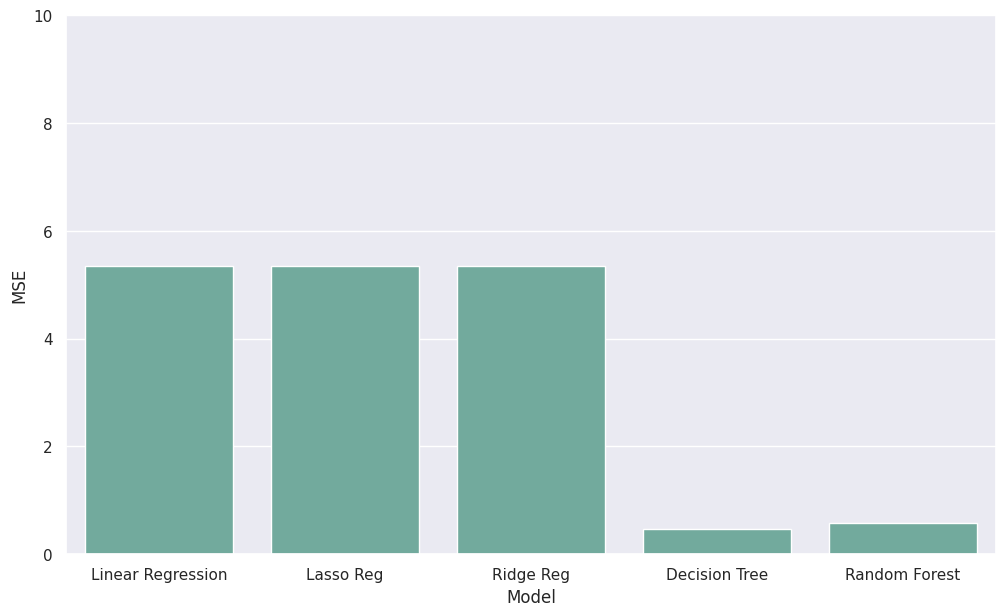

In [54]:
#plot MSE comparison

sns.set(style="darkgrid")

# Set the figure size
fig, ax =  plt.subplots(figsize=(12, 7))
ax.set_ylim(0, 10)
# plot a bar chart
sns.barplot(
    x="Model", 
    y="MSE", 
    data=model_performance,  
    ci=None, 
    color='#69b3a2',
    orient = 'v');
plt.show()

# Conclusion: 

After performing various experiments and analyzing the outcomes, it can be deduced that the random forest algorithm delivers the highest accuracy for our dataset. In comparison to other machine learning methods such as decision trees, logistic regression,and, random forest consistently outperforms them. 

The effectiveness of the random forest algorithm can be credited to its capacity to handle voluminous datasets, deal with missing values, and alleviate overfitting by using numerous decision trees. Hence, based on the findings, it is recommended that the random forest algorithm be utilized for further investigation and forecasts on this dataset.